<h1>Don't Overfit !</h1>

<h1>Exploratory Data Analysis</h1>

In [1]:
#Modules Required
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, Binarizer, KernelCenterer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['font.family'] = 'DejaVu Sans'
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from tqdm import tqdm_notebook as tqdm
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import validation_curve, learning_curve, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
RANDOM_STATE = 78
import warnings
warnings.filterwarnings('ignore')

/home/hardik/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
Using TensorFlow backend.


In [2]:
#Loading dataset
train = pd.read_csv("../Datasets/train.csv")    #train dataset ../
test  = pd.read_csv("../Datasets/test.csv")     #test dataset  ../

features = train.columns.drop(['id', 'target']) #dropped id and target                      

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (250, 302)
Test Shape: (19750, 301)


In [3]:
train.head()    #printing inital rows of head data

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [4]:
test.head()     #printing initial rows of test data

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [5]:
#Checking if NULL or missing values exist
print("Count of NAN in train :",train.isnull().sum().sum())
print("Count of NAN in test :",test.isnull().sum().sum())

Count of NAN in train : 0
Count of NAN in test : 0


In [6]:
train.target.describe()   #printing distribution of target variable

count    250.000000
mean       0.640000
std        0.480963
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [7]:
feat = train.drop(['id','target'], axis=1)   #all features
std_feat = feat.std(axis=1)                  #standard deviation of features
mean_feat = feat.mean(axis=1)                #mean of features
print("Mean :")
mean_feat

Mean :


0     -0.009223
1      0.086130
2      0.027657
3      0.088357
4      0.134413
         ...   
245   -0.022233
246    0.017820
247   -0.087237
248    0.036570
249    0.030730
Length: 250, dtype: float64

In [8]:
print("Standard Deviation :")
std_feat

Standard Deviation :


0      1.089171
1      0.985838
2      1.012757
3      0.939743
4      0.941277
         ...   
245    1.081211
246    0.979557
247    1.042626
248    1.017994
249    0.947306
Length: 250, dtype: float64

<h4>The values are in a small range. No need to scale</h4>

<h2>Test for Time Series</h2>

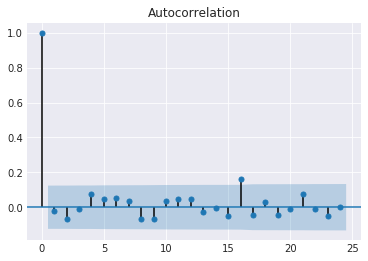

In [9]:
#ACF and PACF plots to check if data follows a time series pattern
plot_acf(train['target'])
plt.show()

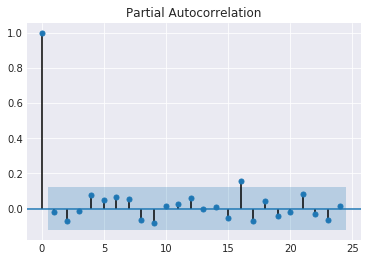

In [10]:
plot_pacf(train['target'])
plt.show()

<h3>As can be seen the acf and pacf have low values indicating infinitesimal correlation if any between the rows.</h3>

<h1>Test for overfitting data</h1>

<h3>Using a Logistic Regression Model</h3>

In [11]:
#Data for model
x_train = train.drop(['id', 'target'], axis=1)     #feature matrix
y_train = train['target']                          #target column
x_test = test.drop(['id'], axis=1)                 #feature matrix for test
#Model instance
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(x_train, y_train)                 #training
#Predict for multiple observations
predictions = logisticRegr.predict(x_test)
# Measuring model performance
score_train = logisticRegr.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")
print("Test Score (AUC) evaluated by Kaggle :",str(66.2)+" %")

Train Score : 100.0 %
Test Score (AUC) evaluated by Kaggle : 66.2 %


![LogitOverfit.png](attachment:Screenshots/LogitOverfit.png)

<h3>Analysis :</h3>
<h3>A good fit is achieved of the model on the training data, while it does not generalize well on new, unseen data. The model learned patterns specific to the training data, which are irrelevant in other data. Accuracy achieved on the training data in 100% while the AUC score is  0.662 on the test data evaluated by Kaggle thus, the model clearly overfits on the dataset.</h3>
<h3>Fitting high dimensional data with very low number of instances as in this case has led overfitting due to high complexity.</h3>

<h1>Feature Analysis using Extra Trees Classifier</h1>

<b>Extra Trees Classifier is being used for feature selection. It is an ensemble learning method fundamentally based on decision trees. Like Random Forest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting</b>

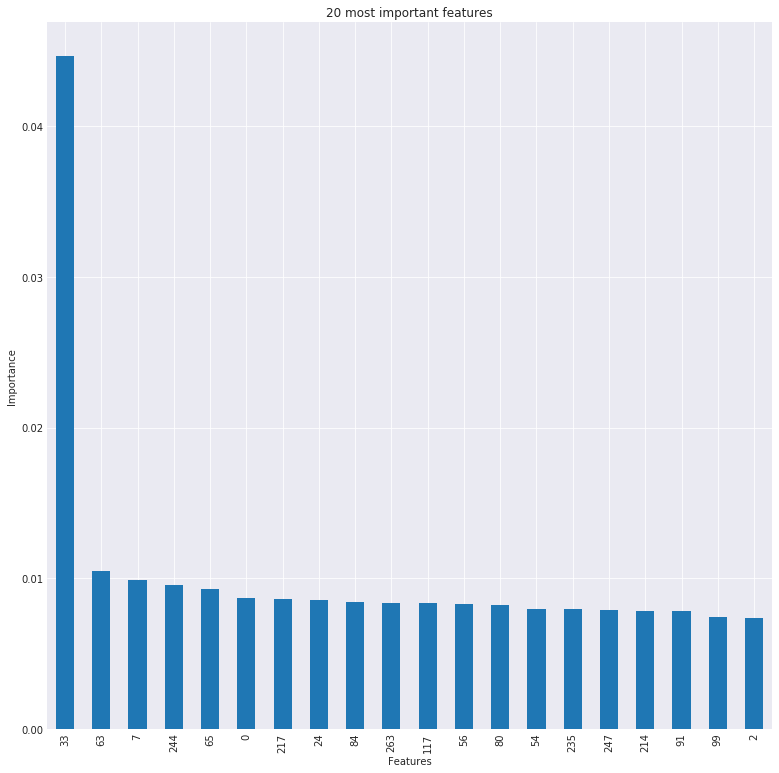

In [12]:
# Feature Selection using Feature Importance
# 20 important features :

#Dropping id and target column as they are not part of the features
x = train.drop(['id', 'target'], axis=1) #independent columns
#The target column in train set
y = train['target']
#Object to extra trees classifier to select significant features  
model = ExtraTreesClassifier(n_estimators = 10)
#Fitting the model on the data
model.fit(x,y)
#print(model.feature_importances_) #inbuilt class feature_importances of tree based classifiers
#plot graph of feature importance
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
#Picking 20 features with largest importance values
feat_importances.nlargest(20).plot(kind='bar', figsize=(13,13))
#Adding title to the plot
plt.title("20 most important features")
#Adding xlabel
plt.xlabel("Features")
#Adding ylabel
plt.ylabel("Importance")
#Plot
plt.show()

In [13]:
#create an index array, with the number of features
idx = np.arange(0, x.shape[1])
#Features with importance level greater than the mean importance level
features_to_keep = idx[feat_importances > np.mean(feat_importances)]
#Heatmap of correlated features
#get correlations of features in dataset whose importance is greater than the mean importance
imp_25_feat = feat_importances.nlargest(25)
print("25 most Significant features :")
#Printing the 25 most significant features with their importance values
print(imp_25_feat)

25 most Significant features :
33     0.044651
63     0.010524
7      0.009905
244    0.009534
65     0.009280
0      0.008707
217    0.008613
24     0.008556
84     0.008459
263    0.008394
117    0.008354
56     0.008329
80     0.008264
54     0.008005
235    0.008003
247    0.007879
214    0.007824
91     0.007811
99     0.007442
2      0.007356
200    0.007289
158    0.007279
265    0.007233
138    0.007202
275    0.007180
dtype: float64


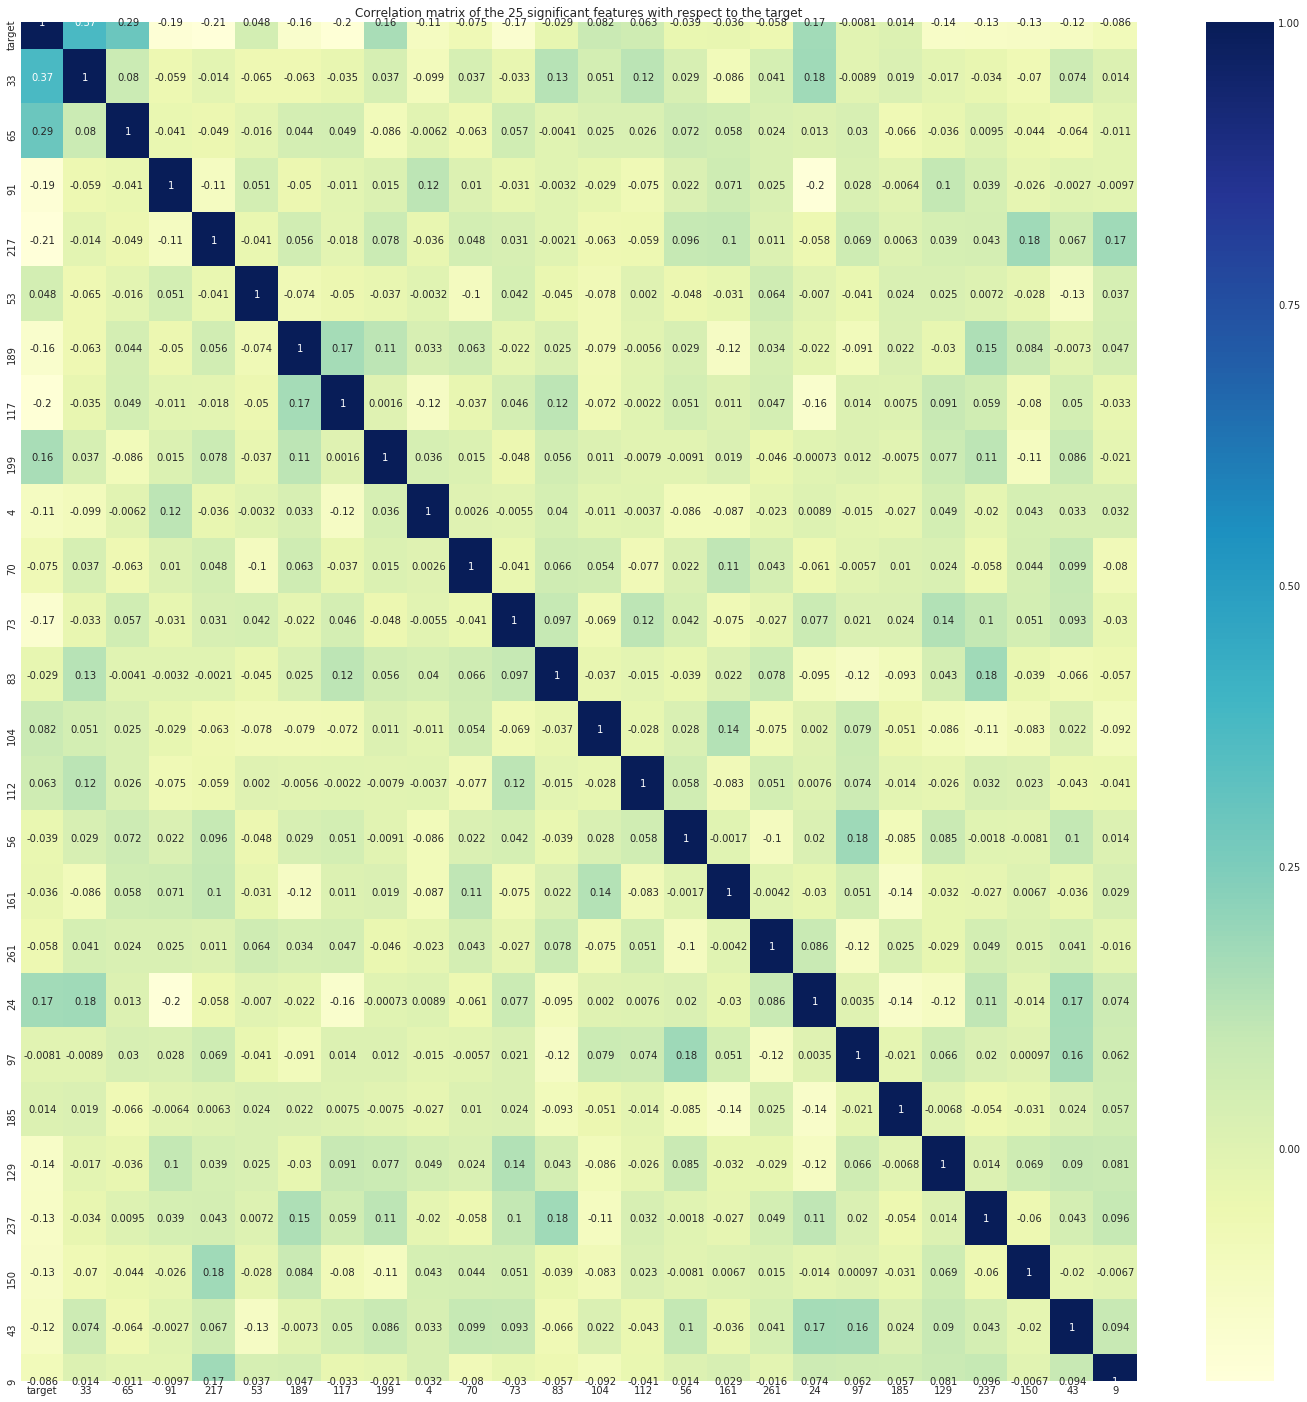

In [14]:
#target correlation matrix
imp_25_feat_list = ['target']
#List of 25 important features
feat_list = ['33','65','91','217','53','189','117','199','4','70','73','83','104','112','56','161','261','24','97','185','129','237','150','43','9']
imp_25_feat_list.extend(feat_list)
#Selecting the respective feature columns
x_feature_selected = train[imp_25_feat_list]
#Plotting correlation matrix with respect to the target
corrmat = x_feature_selected.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#Adding title
plt.title("Correlation matrix of the 25 significant features with respect to the target")
#Adding x axis label
plt.xlabel("Features")
#Adding y axis label
plt.ylabel("Features")
#Plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="YlGnBu") #RdYlGn

<h3>It is evident by the correlation matrix that the significant features are not highly correlated. Thus, we can look it methods like dimensionality reduction.</h3>

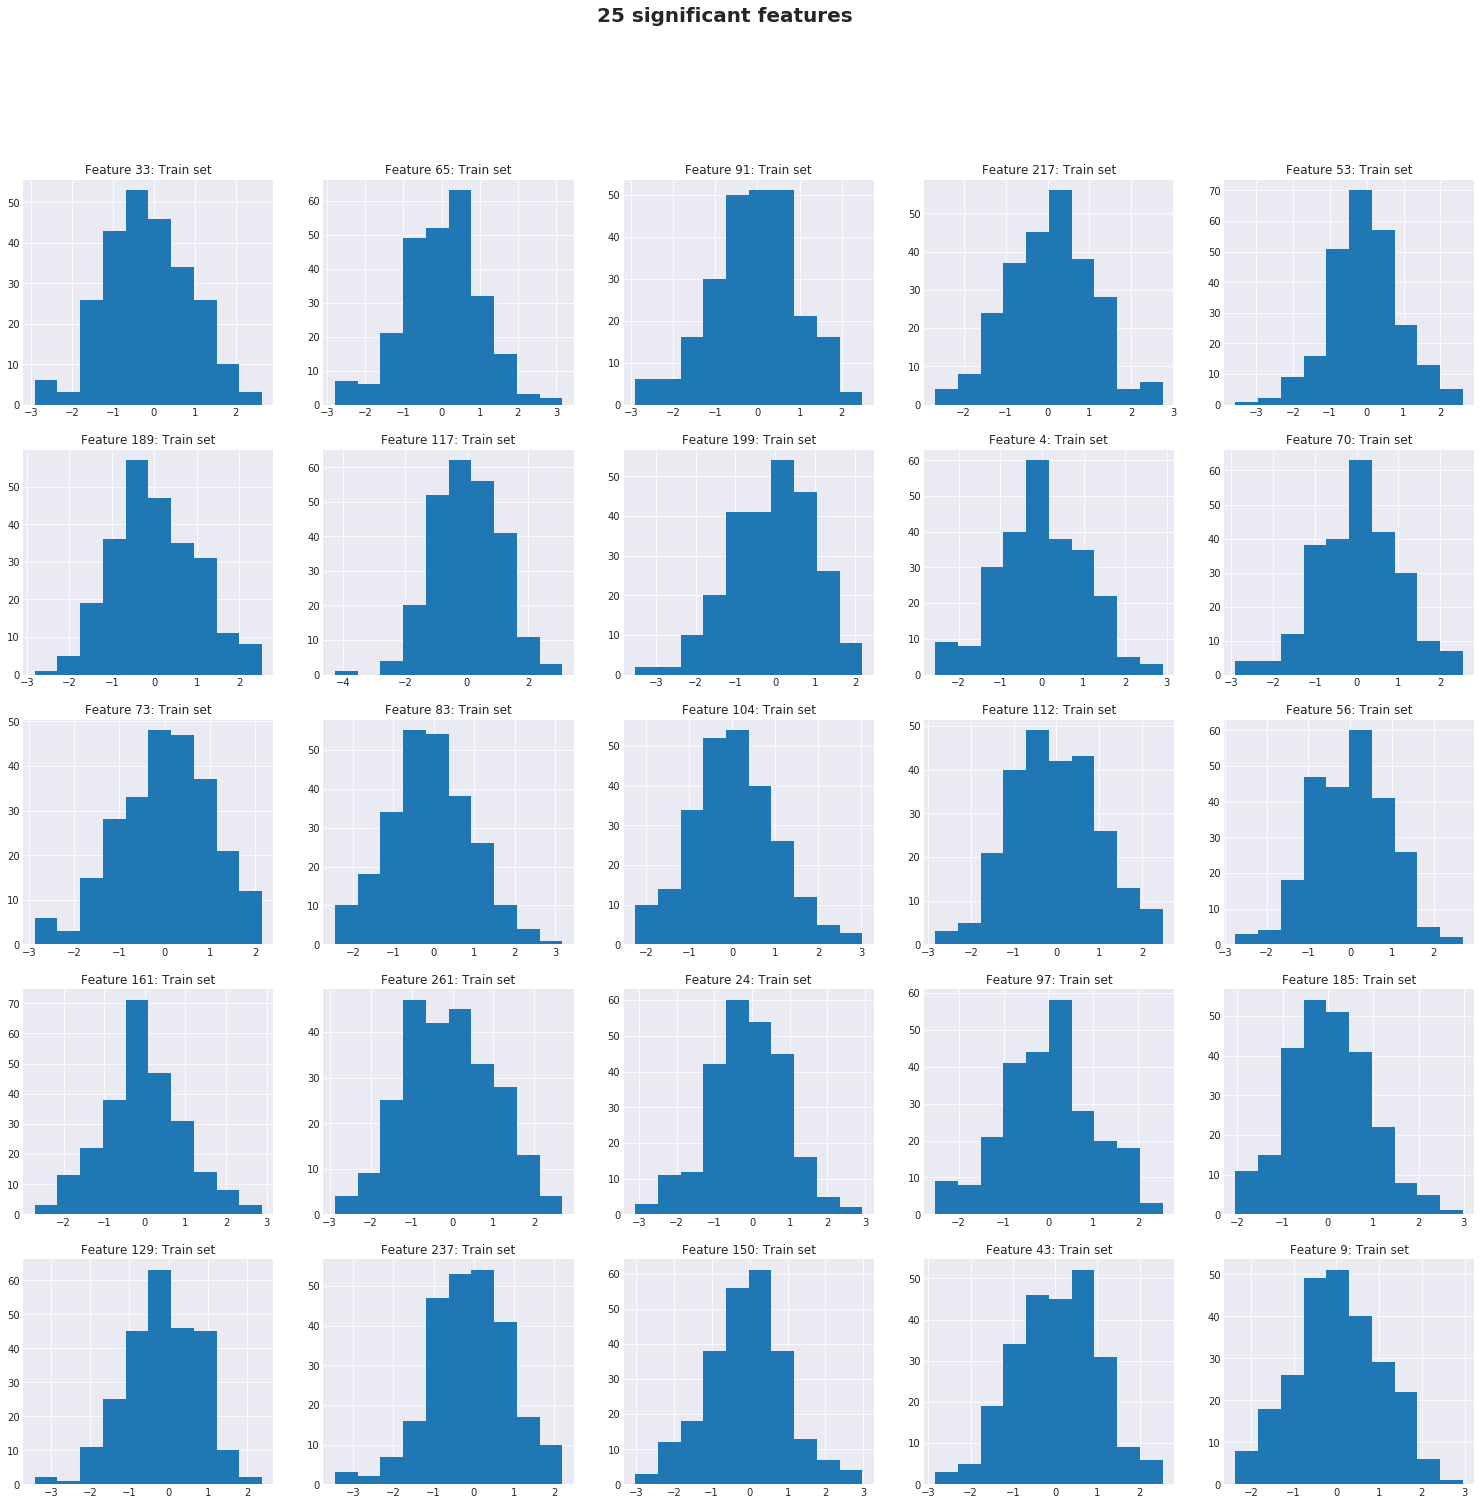

In [15]:
# Histogram plot of 25 significant features
train_plt = train[feat_list]
plt.figure(figsize=(26, 24))
#Adding title
plt.suptitle("25 significant features",fontsize=20, fontweight="bold")
#Plotting the histograms for the significant features.
for i, col in enumerate(list(train_plt.columns)):
    #Grid of 5x5
    plt.subplot(5, 5, i + 1)
    #Plot hist
    plt.hist(train_plt[col])
    #Add title
    plt.title('Feature {}: Train set'.format(col))

<h3>It can be seen that the most significant features are normally distributed, and they are unimodal.</h3>

<h1>Performance on different Classification Model & Treatment of Overfitting</h1>

In [16]:
#Functions that writes Predicted values in a CSV file
ids = test['id']
x_train = train.drop(['id', 'target'], axis=1)     #feature matrix
y_train = train['target']                          #target column
x_test = test.drop(['id'], axis=1)                 #feature matrix for test

def write_csv(predictions, model_name):
    output = pd.DataFrame()
    output['id'] = ids
    output['target'] = predictions
    output.to_csv('Output'+model_name+'.csv',index=None)

<h2>1. SVM<h2>

In [17]:
# Perform SVM to fit a model
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)

# Predict target values for test data
predictions = classifier.predict(x_test)

# writing results to csv
#write_csv(predictions,'SVM')

#Training Data Accuracy
score_train = classifier.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 100.0 %


<h3>Test Score obtained on Kaggle for SVM:</h3>

![SVM.png](attachment:Screenshots/SVM.png)

<h2>2. Decision Trees</h2>

In [18]:
# Perform Decision Trees to fit a model
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(x_train, y_train)

# Predict target values for test data
predictions = classifier.predict(x_test)

#writing results to csv
#write_csv(predictions,'DecisionTrees')

#Training Data Accuracy
score_train = classifier.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 100.0 %


<h3>Test Score obtained on Kaggle for Decision Trees:</h3>

![DecisionTrees.png](attachment:Screenshots/DecisionTrees.png)

<h2>3. GaussianNB</h2>

In [19]:
# Perform GaussianNB to fit a model
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predict target values for test data
predictions = classifier.predict(x_test)

#writing results to csv
#write_csv(predictions,'GaussianNB')

#Training Data Accuracy
score_train = classifier.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 98.4 %


<h3>Test Score obtained on Kaggle for GaussianNB:</h3>

![GaussianNB.png](attachment:Screenshots/GaussianNB.png)

<h2>4. Gaussian Process Classifier</h2>

In [20]:
# Perform Gaussian Process Classifier to fit a model
classifier = GaussianProcessClassifier()
classifier.fit(x_train, y_train)

# Predict target values for test data
predictions = classifier.predict(x_test)

#writing results to csv
#write_csv(predictions,'Gaussian Process Classifier')

#Training Data Accuracy
score_train = classifier.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 100.0 %


<h3>Test Score obtained on Kaggle for Gaussian Process Classifier:</h3>

![GaussianProcess.png](attachment:Screenshots/GaussianProcess.png)

<h2>5. Random Forest Classifier</h2>

In [21]:
# Perform Random Forest Classifier to fit a model
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

# Predict target values for test data
predictions = classifier.predict(x_test)

#writing results to csv
#write_csv(predictions,'Random Forest Classifier')

#Training Data Accuracy
score_train = classifier.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 98.0 %


<h3>Test Score obtained on Kaggle for Random Forest Classifier:</h3>

![RandomForest.png](attachment:Screenshots/RandomForest.png)

<h2>6. AdaBoost Classifier</h2>

In [22]:
# Perform AdaBoost Classifier to fit a model
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(x_train, y_train)

# Predict target values for test data
ytest = classifier.predict(x_test)

#writing results to csv
#write_csv(predictions,'AdaBoost Classifier')

#Training Data Accuracy
score_train = classifier.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 100.0 %


<h3>Test Score obtained on Kaggle for AdaBoost Classifier:</h3>

![AdaBoost.png](attachment:Screenshots/AdaBoost.png)

<h2>7. KNeighbors Classifier</h2>

In [23]:
# Perform KNeighbors Classifier to fit a model
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(x_train, y_train)

# Predict target values for test data
predictions = classifier.predict(x_test)

#writing results to csv
#write_csv(predictions,'KNeighbors Classifier')

#Training Data Accuracy
score_train = classifier.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 74.4 %


<h3>Test Score obtained on Kaggle for KNeighbors Classifier:</h3>

![KNeighbors.png](attachment:Screenshots/KNeighbors.png)

<h2>8. ANN </h2>

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Define ANN Model
classifier = Sequential()
classifier.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal', input_dim = 300))
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))

# Compile the ANN Model
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the ANN Model to test data
classifier.fit(x_train,y_train, batch_size = 5, epochs = 250)

# Test the model
y_test = classifier.predict(x_test)
predictions = [1 if i > 0.60 else 0 for i in y_test]

#writing results to csv
#write_csv(predictions,'ANN')

# Evaluate the model on training data
results = classifier.evaluate(x_train, y_train, batch_size=5, verbose=0)

Epoch 1/250
250/250 [==============================] - 0s 636us/step - loss: 0.6855 - accuracy: 0.5800
Epoch 2/250
250/250 [==============================] - 0s 388us/step - loss: 0.6619 - accuracy: 0.6760
Epoch 3/250
250/250 [==============================] - 0s 323us/step - loss: 0.6327 - accuracy: 0.7160
Epoch 4/250
250/250 [==============================] - 0s 332us/step - loss: 0.5919 - accuracy: 0.7800
Epoch 5/250
250/250 [==============================] - 0s 346us/step - loss: 0.5396 - accuracy: 0.8760
Epoch 6/250
250/250 [==============================] - 0s 376us/step - loss: 0.4781 - accuracy: 0.9200
Epoch 7/250
250/250 [==============================] - 0s 282us/step - loss: 0.4135 - accuracy: 0.9440
Epoch 8/250
250/250 [==============================] - 0s 356us/step - loss: 0.3534 - accuracy: 0.9600
Epoch 9/250
250/250 [==============================] - 0s 350us/step - loss: 0.3004 - accuracy: 0.9680
Epoch 10/250
250/250 [==============================] - 0s 366us/step - l

250/250 [==============================] - 0s 282us/step - loss: 0.0214 - accuracy: 1.0000
Epoch 80/250
250/250 [==============================] - 0s 341us/step - loss: 0.0210 - accuracy: 1.0000
Epoch 81/250
250/250 [==============================] - 0s 343us/step - loss: 0.0207 - accuracy: 1.0000
Epoch 82/250
250/250 [==============================] - 0s 278us/step - loss: 0.0203 - accuracy: 1.0000
Epoch 83/250
250/250 [==============================] - 0s 277us/step - loss: 0.0200 - accuracy: 1.0000
Epoch 84/250
250/250 [==============================] - 0s 279us/step - loss: 0.0197 - accuracy: 1.0000
Epoch 85/250
250/250 [==============================] - 0s 280us/step - loss: 0.0193 - accuracy: 1.0000
Epoch 86/250
250/250 [==============================] - 0s 299us/step - loss: 0.0190 - accuracy: 1.0000
Epoch 87/250
250/250 [==============================] - 0s 285us/step - loss: 0.0187 - accuracy: 1.0000
Epoch 88/250
250/250 [==============================] - 0s 317us/step - loss:

250/250 [==============================] - 0s 291us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 158/250
250/250 [==============================] - 0s 784us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 159/250
250/250 [==============================] - 0s 407us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 160/250
250/250 [==============================] - 0s 252us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 161/250
250/250 [==============================] - 0s 660us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 162/250
250/250 [==============================] - 0s 511us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 163/250
250/250 [==============================] - 0s 377us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 164/250
250/250 [==============================] - 0s 638us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 165/250
250/250 [==============================] - 0s 407us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 166/250
250/250 [==============================] - 0s 249us/ste

250/250 [==============================] - 0s 296us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 236/250
250/250 [==============================] - 0s 327us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 237/250
250/250 [==============================] - 0s 325us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 238/250
250/250 [==============================] - 0s 313us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 239/250
250/250 [==============================] - 0s 277us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 240/250
250/250 [==============================] - 0s 316us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 241/250
250/250 [==============================] - 0s 277us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 242/250
250/250 [==============================] - 0s 304us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 243/250
250/250 [==============================] - 0s 315us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 244/250
250/250 [==============================] - 0s 280us/ste

In [25]:
print("Train Accuracy :", str(results[1]*100)+" %")
print("Train Loss :", str(results[0]*100)+" %")

Train Accuracy : 100.0 %
Train Loss : 0.12147806826851593 %


<h3>Test Score obtained on Kaggle for ANN :</h3>

![AAN.png](attachment:Screenshots/AAN.png)

<h1>Dimensionality Reduction</h1>

<h2>Lasso Regression : Feature Selection</h2>

In [26]:
#L1 regularisation
random_state = 0
X_trainl, X_testl, y_trainl = train.drop(['id', 'target'], axis=1), test.drop(['id'], axis=1), train['target']
#Standardise(Normalisation) the attributes with mean = 0 and variance = 1.

#Train data
scale = StandardScaler()
scale.fit(X_trainl)
X_train_opt = scale.transform(X_trainl)
X_train_df = pd.DataFrame(data=X_train_opt, columns=X_trainl.columns)

#Test data
X_test_opt = scale.transform(X_testl)
X_test_df = pd.DataFrame(data=X_test_opt, columns=X_testl.columns)
X_test_opt = X_test_df.values


#Hyperparameter = lambda
#Using Logistic Regression with l1 regularisation
logit = LogisticRegression(random_state=random_state)
#Using ROC_AUC score for testing each lambda value
rocauc_score = make_scorer(roc_auc_score) 
#Using GridSearch to search for the best lambda value for the model
parameter_grid = {'class_weight':['balanced'], 'penalty' : ['l1'], 'C':[0.0001, 0.0005, 0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1,10, 100, 1000, 1500, 2000, 2500,2600, 2700, 2800, 2900, 3000, 3100, 3200],'max_iter' : [100, 1000, 2000, 5000, 10000] }
X_train_opt = X_train_df.values
#Grid Search
grid = GridSearchCV(estimator=logit,param_grid=parameter_grid,scoring=rocauc_score,verbose=1,cv=20,n_jobs=-1)
grid.fit(X_train_opt, y_trainl)
best_score = grid.best_score_
best_para = grid.best_params_
best_logit = grid.best_estimator_
#roc_auc Score
print("Best Score obtained is: ", best_score, "for the parameters: ", best_para)
#Hyperparameters of the best model
print(best_logit)

Fitting 20 folds for each of 110 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score obtained is:  0.7203 for the parameters:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1'}
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:   31.8s finished


</h4><b>ROC_AUC Score of 0.7203</b><h4>

In [27]:
#Creating a Logistic Regression Model with l1 Regularisation with the above obtained best hyperparameters
model = LogisticRegression(C=0.1, class_weight='balanced', dual=False,fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='warn', n_jobs=None, penalty='l1', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False);
model.fit(X_train_opt, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#Generating the predicted values and testing them on Kaggle to get a score
y_pred_logit_lasso = model.predict_proba(X_test_opt)[:,1]

#Train Score on the model
score_train = model.score(X_train_opt, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 87.6 %


<h3>Test Score obtained on Kaggle for Lasso Regression :</h3>

![Lasso.png](attachment:Screenshots/Lasso.png)

<h3>Scores after Feature Selection using Logistic Regression with L1 Regularisation :</h3>
<h3>Train Score : 87.6% </h3>
<h3>Test Score : 84.8% </h3>
<h3>Therefore, it is evident from the above scores that the model may not be overfitting anymore as through feature selection optimal train and test scores were obtained</h3>

<h2>PCA</h2>

<h3>Attempting PCA with Different Standardization Methods</h3>

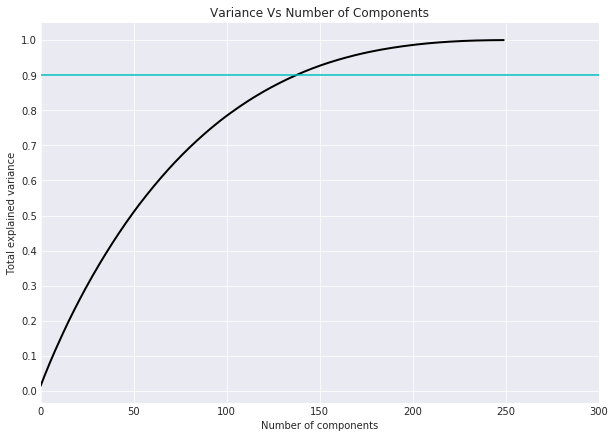

In [29]:
pca = PCA().fit(x_train)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.title("Variance Vs Number of Components")
plt.show()

In [30]:
#Standardising Train and Test data

#Standard Scaler
sc0 = StandardScaler()
X_train0 = sc0.fit_transform(x_train)
X_test0 = sc0.transform(x_test)

#Robust Scaler
sc1 = RobustScaler()
X_train1 = sc1.fit_transform(x_train)
X_test1 = sc1.transform(x_test)

#Binarizer
sc2 = Binarizer()
X_train2 = sc2.fit_transform(x_train)
X_test2 = sc2.transform(x_test)

#Kernel Centerer
sc3 = KernelCenterer()
X_train3 = sc3.fit_transform(x_train)
X_test3 = sc3.transform(x_test)

In [31]:
#Plot function
def plot_pca_train(X0, X1, X2, X3, y_train):
    fig, ax = plt.subplots(2, 2, figsize = (24, 24))
    pca = PCA(n_components=0.9)
    X_reduced0 = pca.fit_transform(X0)
    X_reduced1 = pca.fit_transform(X1)
    X_reduced2 = pca.fit_transform(X2)
    X_reduced3 = pca.fit_transform(X3)
    ax[0,0].scatter(X_reduced0[:, 0], X_reduced0[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[0,0].set_title('PCA projection StdScalar')
    ax[1,0].scatter(X_reduced1[:, 0], X_reduced1[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[1,0].set_title('PCA projection Robust')
    ax[0,1].scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[0,1].set_title('PCA projection Binarizer')
    ax[1,1].scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[1,1].set_title('PCA projection KernelCenterer')
    print(pca.n_components_)

139


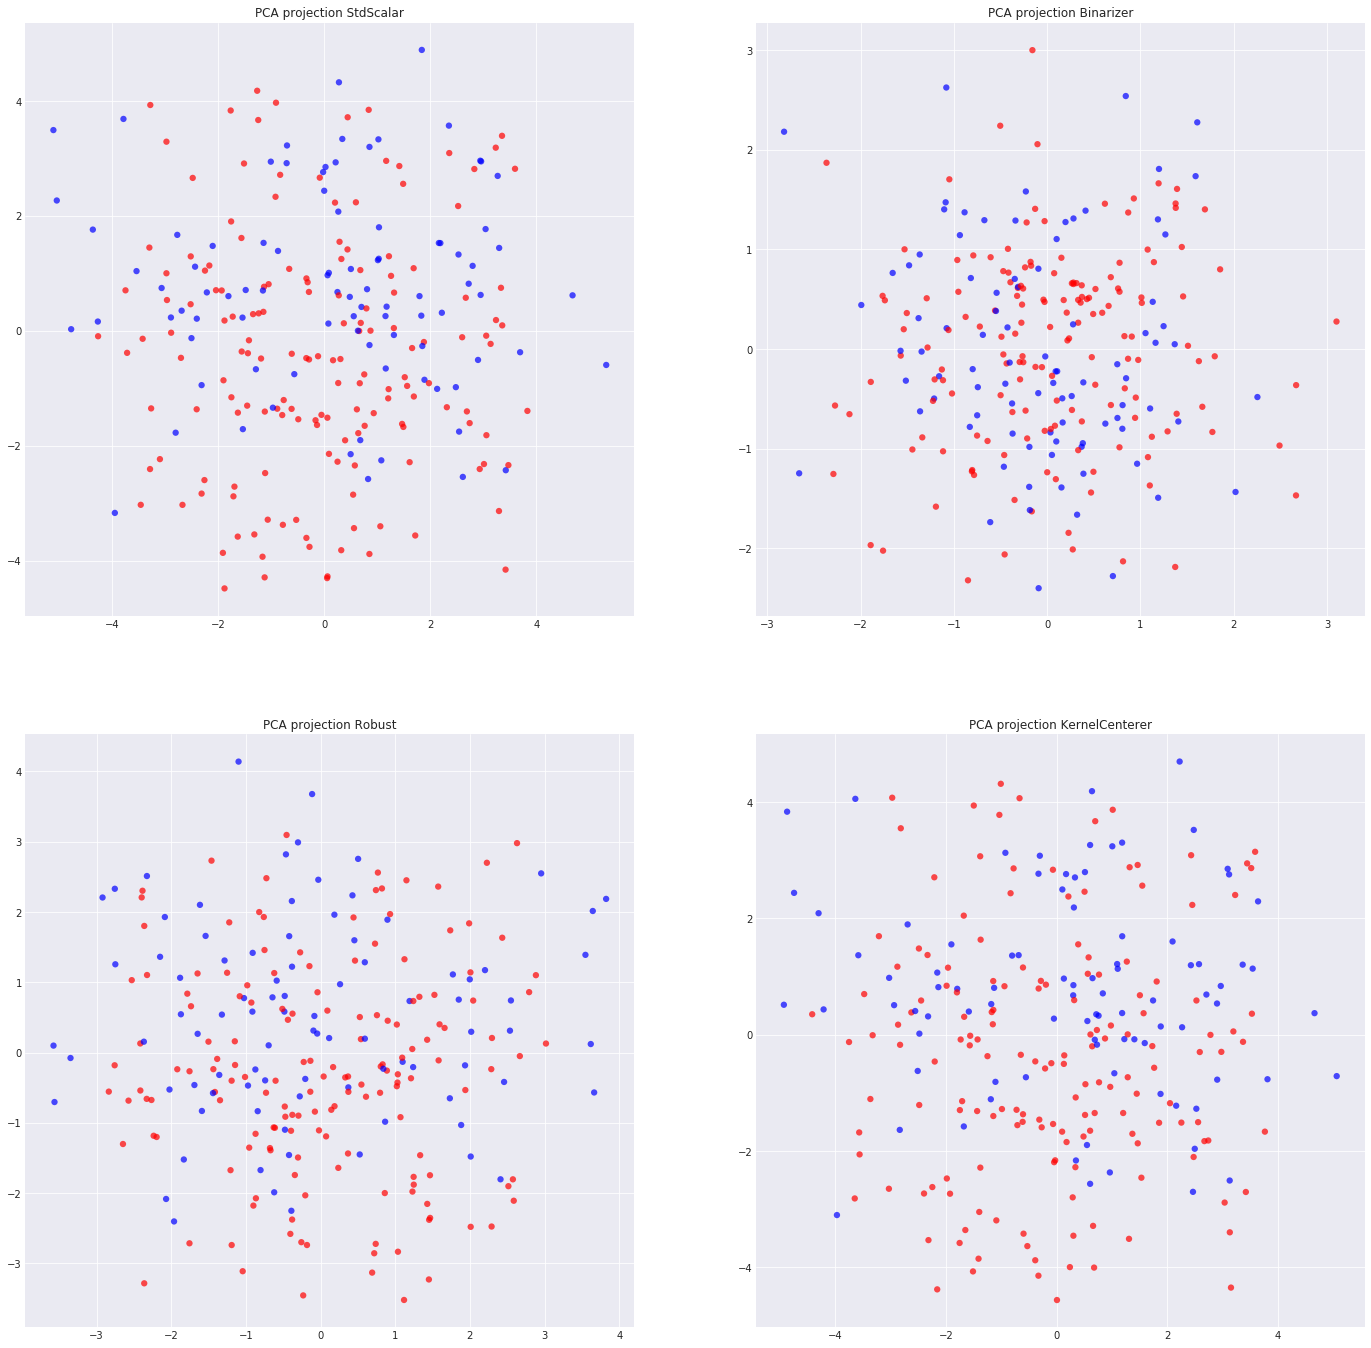

In [32]:
#For Standardized Training Data
plot_pca_train(X_train0, X_train1, X_train2, X_train3, y_train)

<h4>Since, all methods of standardization lead to the same distribution, we will resort to Standard Scaler</h4>

In [33]:
pca = PCA(n_components=0.9)
pca.fit(X_train0)
print("Train Shape : ",X_train0.shape)
print("Test Shape",X_test0.shape)
print("PCA Variance Ratio",pca.explained_variance_ratio_)
X = pca.transform(X_train0)
transformed_test = pca.transform(X_test0)
kf = KFold(n_splits=10)

scores = [] 
best_param = {'C': 0.11248300958542848, 'class_weight': 'balanced', 'max_iter': 50000, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 78, 'solver': 'liblinear'}
#K-fold Validation 
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    model = LogisticRegression(C=0.1, class_weight='balanced', dual=False,fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='warn', n_jobs=None, penalty='l1', random_state=0,solver='warn', tol=0.0001, verbose=0, warm_start=False);
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    scores.append(score)
print("Average Train Accuracy: ", sum(scores)*100/10, "%")
model.fit(X, y_train)
predictions = model.predict(transformed_test)

#writing results to csv
#write_csv(predictions,'PCA')

Train Shape :  (250, 300)
Test Shape (19750, 300)
PCA Variance Ratio [0.01415622 0.01393714 0.01348502 0.01315009 0.01307046 0.0126725
 0.01243153 0.01227743 0.01211999 0.01181826 0.01170782 0.01165683
 0.0115364  0.01140794 0.01121707 0.0111504  0.01081737 0.01071101
 0.0104966  0.0104221  0.01025342 0.01012149 0.01008109 0.00993801
 0.00989862 0.00963252 0.00960297 0.00947231 0.00928126 0.00922146
 0.00910346 0.0089856  0.00896983 0.00884586 0.00869226 0.0086173
 0.0085298  0.00842679 0.0083739  0.00829608 0.00819415 0.00801366
 0.00797007 0.00789624 0.00779693 0.00779394 0.00764892 0.00750039
 0.00745821 0.00742145 0.0073333  0.00722917 0.00713276 0.00709809
 0.00687803 0.00683081 0.00675415 0.00668456 0.00663045 0.00660826
 0.00651001 0.00643364 0.00634674 0.00622924 0.00620219 0.0061603
 0.00607577 0.00604043 0.00596025 0.00589898 0.00581184 0.00570922
 0.00565778 0.00558718 0.00548112 0.00544067 0.00539501 0.00533802
 0.005292   0.00518999 0.0051376  0.00505083 0.00500482 0.00494

<h3>Test Score obtained on Kaggle after PCA :</h3>

![PCA.png](attachment:Screenshots/PCA.png)

<h2>SVD</h2>

In [34]:
train_path = '../Datasets/train.csv'  #paths to data
test_path = '../Datasets/test.csv'

In [35]:
train_df = pd.read_csv(train_path)                          #load the train data
train_df_values = train_df.drop(['id', 'target'], axis = 1)   #retain only required columns for train matrix

In [36]:
X = train_df_values.values                                  #convert the df into array

In [37]:
svd_100 = TruncatedSVD(n_components=100, n_iter=20, random_state=42)  #svd object with 100 components

In [38]:
svd_100.fit(X)                                  

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=20,
             random_state=42, tol=0.0)

In [39]:
print(svd_100.explained_variance_ratio_.sum()) 

0.7803804657811667


<h3>We see that 100 columns explain upto 78% of variance. Let's try 150 columns</h3>

In [40]:
svd_150 = TruncatedSVD(n_components=150, n_iter=20, random_state=42)
svd_150.fit(X)

TruncatedSVD(algorithm='randomized', n_components=150, n_iter=20,
             random_state=42, tol=0.0)

In [41]:
print(svd_150.explained_variance_ratio_.sum()) 

0.9246093979004004


<h3>150 columns gives about 92% variance which seems enough to achieve a parsimonious model</h3>

In [42]:
X_reduced = svd_150.transform(X)

<h3>X_reduced is the new train matrix with 150 columns which explain 92% of the variance. Lasso regression has been the most successful model yet so we will perform lasso regression using this reduced matrix</h3>

In [43]:
test = pd.read_csv(test_path)                 #read test data

In [44]:
X_test = test.drop(['id'], axis=1)            #load X_test and y_train 
y_train = train_df['target']

Rest of the code is borrowed from Lasso Regression which can be found in ../3 folder.

In [45]:
random_state = 0

#Hyperparameter = lambda
#Using Logistic Regression with l1 regularisation
logit = LogisticRegression(random_state=random_state)
#Using ROC_AUC score for testing each lambda value
rocauc_score = make_scorer(roc_auc_score) 
#Using GridSearch to search for the best lambda value for the model
parameter_grid = {'class_weight':['balanced'], 'penalty' : ['l1', 'l2'], 'C':[0.0001, 0.0005, 0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1,10, 100, 1000, 1500, 2000, 2500,2600, 2700, 2800, 2900, 3000, 3100, 3200],'max_iter' : [100, 1000, 2000, 5000, 10000] }

#Grid Search
grid = GridSearchCV(estimator=logit,param_grid=parameter_grid,scoring=rocauc_score,verbose=1,cv=20,n_jobs=-1)
grid.fit(X_reduced, y_train)
best_score = grid.best_score_
best_para = grid.best_params_
best_logit = grid.best_estimator_
#roc_auc Score
print("Best Score obtained is: ", best_score, "for the parameters: ", best_para)
#Hyperparameters of the best model
print(best_logit)

Fitting 20 folds for each of 220 candidates, totalling 4400 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score obtained is:  0.7017 for the parameters:  {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1'}
LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done 4400 out of 4400 | elapsed:   54.0s finished


In [46]:
#Creating a Logistic Regression Model with l1 Regularisation with the above obtained best hyperparameters
model = LogisticRegression(C=1, class_weight='balanced', dual=False,fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='warn', n_jobs=None, penalty='l1', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False);
model.fit(X_reduced, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#Train Score on the model
score_train = model.score(X_reduced, y_train)
print("Train Score :", str(score_train*100)+" %")

Train Score : 100.0 %


In [48]:
#do svd with same params on  X_test 
X_test_reduced = svd_150.transform(X_test)

In [49]:
#Generating the predicted values and testing them on Kaggle to get a score
y_pred_logit_lasso = model.predict_proba(X_test_reduced)[:,1]

In [50]:
#convert to csv to test on kaggle
data = {'id':test['id'], 'target':y_pred_logit_lasso}
df = pd.DataFrame(data)
#writing to csv
#df.to_csv('results.csv', index=False)

<h3>Test Score Obtained on Kaggle after SVD :</h3>

![SVD.png](attachment:Screenshots/SVD.png)